# Erdős–Rényi (ER)

In [1]:
import numpy as np
import scipy as sp
import networkx as nx
import matplotlib.pyplot as plt

import itertools as it
import time
import random

from matplotlib.animation import FuncAnimation
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


The Erdős–Rényi (ER) model is constructed with two-parameters n and p, where n refers to the numbers of nodes or vertices in the network while p refers to the probability where each pair of edges is connected with probability p. As a result, with a higher probability p, an edge is more likely to be formed by connecting the vertices, forming a more densely connected random network. Note that Erdős–Rényi (ER) model tends to have a relatively low clustering coefficient (CC) as there is no preferential in how each pair of vertices will be linked, all have a common probability of p. In addition, note that the distribution of vertex degrees of Erdős–Rényi (ER) model follows a binomial distribution.

To construct a random graph of this model with reference to the Facebook data, the parameter n, number of nodes is given by 4039. Meanwhile for the parameter p is given by the formula: p = $\displaystyle\frac{number of actual edges}{maximum possible number of edges}$ = $\frac{88234}{{4039}\choose{2}}$ = $\frac{88234}{4039\times4038\times0.5}$ = 0.01081

C:\Program Files (x86)\WinPython64bit\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Program Files (x86)\WinPython64bit\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Program Files (x86)\WinPython64bit\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Program Fil

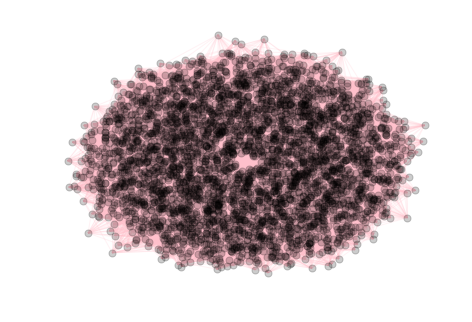

|V| =  4039
|E| =  87607
CC =  0.010681362162713127


In [2]:
n = 4039
p = 0.01081

G = nx.erdos_renyi_graph(n,p)
nx.draw(G, node_size = 50, node_color = 'black', alpha = 0.2, edge_color = 'pink')
plt.show()

print('|V| = ', nx.number_of_nodes(G))
print('|E| = ', nx.number_of_edges(G))
print('CC = ', nx.average_clustering(G))

Below we plot a histogram of the distribution of vertex degrees of Erdős–Rényi (ER) model

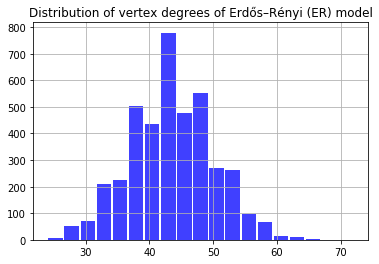

|V| =  4039
|E| =  87936
CC =  0.010702645178884144


In [4]:
vertex_degrees=list(dict(nx.degree(G)).values())
plt.title('Distribution of vertex degrees of Erdős–Rényi (ER) model')
plt.hist(vertex_degrees, bins = np.linspace(np.min(vertex_degrees),1 + np.max(vertex_degrees), 20), facecolor='blue', alpha=0.75, rwidth=0.9)
plt.grid(True)
plt.show()

print('|V| = ', nx.number_of_nodes(G))
print('|E| = ', nx.number_of_edges(G))
print('CC = ', nx.average_clustering(G))

C:\Program Files (x86)\WinPython64bit\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Program Files (x86)\WinPython64bit\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Program Files (x86)\WinPython64bit\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Program Fil

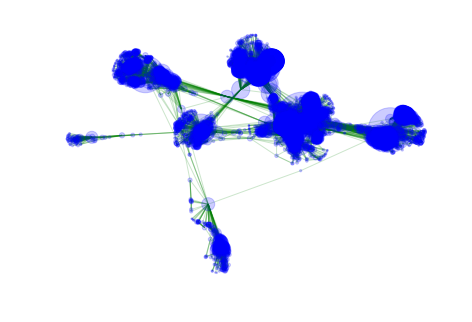

In [5]:
def nice_plot_network(G):
    v_degrees = np.array(list(dict(nx.degree(G)).values()))
    nx.draw(G, node_size = 2.5 * v_degrees, node_color = 'blue', alpha = 0.2, edge_color = 'green')
    return None

#We load the facebook data
FbData = np.loadtxt("facebook_combined.txt.gz")
FbData = FbData.astype(int)

#We plot the facebook data graph
H = nx.Graph()
H.add_edges_from(FbData)
nice_plot_network(H)
plt.show()

Below we plot a histogram of the distribution of vertex degrees of Facebook model

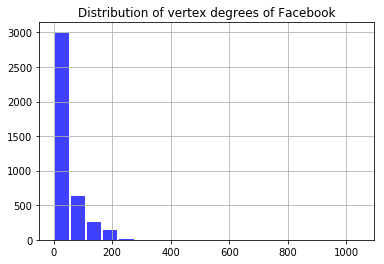

|V| =  4039
|E| =  88234
CC =  0.6055467186200871


In [6]:
vertex_degrees=list(dict(nx.degree(H)).values())
plt.title('Distribution of vertex degrees of Facebook')
plt.hist(vertex_degrees, bins = np.linspace(np.min(vertex_degrees),1 + np.max(vertex_degrees), 20), facecolor='blue', alpha=0.75, rwidth=0.9)
plt.grid(True)
plt.show()

print('|V| = ', nx.number_of_nodes(H))
print('|E| = ', nx.number_of_edges(H))
print('CC = ', nx.average_clustering(H))

Below we plot a histogram of the distribution of vertex degrees of Erdős–Rényi (ER) model vs Facebook model

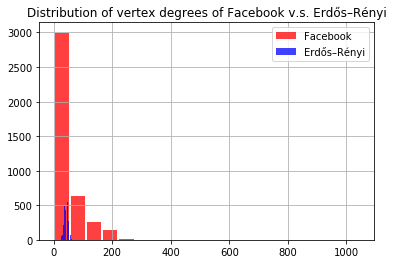

Facebook
|V| =  4039
|E| =  88234
CC =  0.6055467186200871
Average path length =  3.6925068496963913
Average degree =  43.69101262688784
Number of triangles =  1612010.0
Diameter =  8

Erdős–Rényi
|V| =  4039
|E| =  87936
CC =  0.010702645178884144
Average path length =  2.6079925775692936
Average degree =  43.5434513493439
Number of triangles =  13673.0
Diameter =  4


In [11]:
vertex_degrees=list(dict(nx.degree(H)).values())
plt.hist(vertex_degrees, bins = np.linspace(np.min(vertex_degrees),1 + np.max(vertex_degrees), 20), facecolor='red', label = 'Facebook', alpha=0.75, rwidth=0.9)

vertex_degrees=list(dict(nx.degree(G)).values())
plt.hist(vertex_degrees, bins = np.linspace(np.min(vertex_degrees),1 + np.max(vertex_degrees), 20), facecolor='blue', label = 'Erdős–Rényi', alpha=0.75, rwidth=0.9)

plt.title('Distribution of vertex degrees of Facebook v.s. Erdős–Rényi')

plt.grid(True)
plt.legend(loc = 'upper right')
plt.show()

print('Facebook')
print('|V| = ', nx.number_of_nodes(H))
print('|E| = ', nx.number_of_edges(H))
print('CC = ', nx.average_clustering(H))
print('Average path length = ', nx.average_shortest_path_length(H))
print('Average degree = ', (2*nx.number_of_edges(H)/nx.number_of_nodes(H)))
print('Number of triangles = ', np.trace(np.matrix((nx.adj_matrix(H).todense()**3))/6))
print('Diameter = ', nx.diameter(H))

print('')

print('Erdős–Rényi')
print('|V| = ', nx.number_of_nodes(G))
print('|E| = ', nx.number_of_edges(G))
print('CC = ', nx.average_clustering(G))
print('Average path length = ', nx.average_shortest_path_length(G))
print('Average degree = ', (2*nx.number_of_edges(G)/nx.number_of_nodes(G)))
print('Number of triangles = ', np.trace(np.matrix((nx.adj_matrix(G).todense()**3))/6))
print('Diameter = ', nx.diameter(G))

Based on the results generated above, we observed that the number of edges formed for the ER model is slightly higher than the Facebook model. The small difference is due to the fact that Facebook have different characteristic from a ER random network model. More importantly, observe that there is a huge difference between their clustering coefficient with Facebook having a CC = 0.6055 while a ER having a low CC = 0.0107. This phenomenon is due to Facebook random network having a preferential in the way vertices are joined while for a random ER network have a common probability of p. In addition, when we compare the distribution of vertex degrees through the histogram as shown above. We can clearly see that there is a significant difference in the distribution where the ER model follows a binomial distribution while the Facebook model follows a negative exponential distribution. 

The diameter (longest shortest path) is the maximum eccentricity where the eccentricity of a node v is the maximum distance from a node v to all other nodes in the network. Having a smaller diameter value shows that the spread of information is more rapid and efficient as it already the longest shortest distance to reach other members of the network. By comparing ER and the Facebook model we can see that the ER model diameter is half smaller than Facebook, hence the ER model does not really resembles Facebook network.

Average path length is the shortest path between all pairs of nodes, it can be calculated by adding them up and dividing by the total number of pairs. This will show us the number of steps on average it takes to get from one member of network to another member. Similarly having a shorter average path length is advantageous for spread of information in a network. By comparision the average path length for ER is shorter than the Facebook model by more than 1 length, hence the ER model does not really resembles Facebook model.

Number of triangle tells us how many 3 way relationship of a node to their surround nodes are formed in the network model. It can be closely related with the average CC as it tells us how closely the neighbors of a node v are connected. In the context of a network, it represents the clustering of information spread to their surrounding neighbors. By comparison the number of triangles formed by the ER network is significantly lower than of Facebook, these tells us that ER model poorly describes out the nature of Facebook model.

Average degree refers to the average number of edges a vertex is connected with. In the context of a network, having a higher average degree means the spread of information from a node can be easily spread to many other nodes. This would means that information can be spread from all directions resulting in a rapid and efficient network of information spread. By comparsion we could clearly see that the ER model resembles Facebook model in terms of the average degree as the values only differs by insignificant values. Hence the average degree parameter is the only parameter that relates well to the Facebook model.

Hence we can conclude that the ER random network model describes poorly about the nature of Facebook network. By taking into considerations of the all parameters compared, we can conclude that the ER random network model describes poorly about the nature of Facebook network.


